In [67]:
# -*- coding: utf8 -*-
%pylab inline

import pandas as pd
import numpy as np
pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (12, 5)
import json

Populating the interactive namespace from numpy and matplotlib


### profile

| field            | type   | Description              |
|------------------|--------|--------------------------|
| customer_id      | String | 客戶 ID                  |
| birth_time       | Long   | 出生時間戳記              |
| gender           | String | 性別                     |
| contact_loc      | String | 居住地區                  |
| contact_code     | String | 居住地區郵遞區號代碼       |
| register_loc     | String | 戶籍地區                  |
| register_code    | String | 戶籍地區郵遞區號代碼     |
| start_time       | Long   | 起始往來時間戳記         |
| aum              | Double | 近三個月平均的總資產餘額 |
| net_profit       | Double | 近一年淨收益             |
| credit_card_flag | String | 是否有信用卡產品往來     |
| loan_flag        | String | 是否有貸款產品往來       |
| deposit_flag     | String | 是否有存款產品往來       |
| wealth_flag      | String | 是否有理財產品往來       |
| partition_time   | Long   | snapshot時間戳記     |

In [21]:
data=pd.read_csv("profile_1.csv")
data

,customer_id,birth_time,gender,contact_loc,contact_code,register_loc,register_code,start_time,aum,net_profit,credit_card_flag,loan_flag,deposit_flag,wealth_flag,partition_time
0,1,1083060338,F,I,292141,F,606063,3667420800,173.028965,168.625836,Y,Y,Y,Y,3696969600
1,1,1083060338,F,I,292141,F,606063,3667420800,169.550963,168.467397,Y,Y,Y,N,3699475200


## event
### themes
* cctxn  信用卡消費
* atm    ATM 交易
* cti    客服中心進線
* mybank MyBank 交易



| field          | type   | description                          |
|----------------|--------|--------------------------------------|
| actor_type     | String | 值皆是"customer_id"                  |
| actor_id       | String | 行為者ID                             |
| action_type    | String | 行為類型                             |
| action_time    | Long   | 行為發生時間戳記                     |
| object_type    | String | 影響物件類型                         |
| object_id      | String | 影響物件ID                           |
| channel_type   | String | 通路類型                             |
| channel_id     | String | 通路ID                               |
| attrs          | String | 補充資料 - JSON string               |
| partition_time | Long   | 最近上一區段時間戳記 (可串連profile) |
| theme          | String | 主題 - cc_txn, atm, cti, mybank      |

# cctxn 信用卡消費

In [45]:
data=pd.read_csv("cctxn_1.csv")
data

,actor_type,actor_id,action_type,action_time,object_type,object_id,channel_type,channel_id,attrs,partition_time,theme
0,customer_id,1,cash_advance,3697095641,merchant_nbr,QYOJMXCCREMKJEOKLWUI,credit_card,ZLRJTUPFJSDRFJFKURQP,"{""action"": {""txn_amt"": 636.1045150272515, ""ori...",3696969600,cc_txn
1,customer_id,1,purchase_consumption,3697656582,merchant_nbr,RVZPYYIYSDYAMPVLOVFJ,credit_card,SHHCTTOLPRNOTGPVYFXR,"{""action"": {""txn_amt"": 753.3877214961954, ""ori...",3696969600,cc_txn
2,customer_id,1,purchase_consumption,3698028058,merchant_nbr,UOHNJGTLKWKMTWFRJCNY,credit_card,FFSJSSCIVHDCIULWPPNT,"{""action"": {""txn_amt"": 319.7759132835427, ""ori...",3696969600,cc_txn
3,customer_id,1,purchase_consumption,3698071617,merchant_nbr,CGTNCWJLGOYAKVVLQXGP,credit_card,ZUAEEVYUBPCUXYCRUHZY,"{""action"": {""txn_amt"": 147.37008400058028, ""or...",3696969600,cc_txn
4,customer_id,1,cash_advance,3698251396,merchant_nbr,INZHHMCNOKDSMKNKEJPI,credit_card,CVENEQKVTZQRDKBFTWTH,"{""action"": {""txn_amt"": 196.1426842614706, ""ori...",3696969600,cc_txn
5,customer_id,1,cash_advance,3698821969,merchant_nbr,OLIFHVJOKMKXLVKBRNAJ,credit_card,AIIJNCLECPSDLVBDHYUI,"{""action"": {""txn_amt"": 546.8599399230856, ""ori...",3696969600,cc_txn


# cctxn 的 attrs 裡面的資料 不知道是什麼?

In [46]:
data['attrs'].apply(lambda x:json.loads(x))[0]

{u'action': {u'original_currency_code': u'TWD', u'txn_amt': 636.1045150272515},
 u'channel': {u'card_level': u'4', u'card_type': u'A'},
 u'object': {u'merchant_category_code': u'03661'}}

In [47]:
data['attrs'].apply(lambda x:json.loads(x))[1]

{u'action': {u'original_currency_code': u'TWD', u'txn_amt': 753.3877214961954},
 u'channel': {u'card_level': u'3', u'card_type': u'A'},
 u'object': {u'merchant_category_code': u'09223'}}

In [48]:
data['attrs'].apply(lambda x:json.loads(x))[2]

{u'action': {u'original_currency_code': u'TWD', u'txn_amt': 319.7759132835427},
 u'channel': {u'card_level': u'4', u'card_type': u'B'},
 u'object': {u'merchant_category_code': u'0LLL4'}}

# atm ATM 交易

In [49]:
data=pd.read_csv("atm_1.csv")
data

,actor_type,actor_id,action_type,action_time,object_type,object_id,channel_type,channel_id,attrs,partition_time,theme
0,customer_id,1,inquire,3697441132,saving_acct,NAHPXDFRQHWJMUOPGVKY,ATM,BFWIMSCOXPEYPLIDHYXA,"{""action"": {""txn_amt"": 0.0, ""txn_fee_amt"": 0.0...",3696969600,atm
1,customer_id,1,withdraw,3697581404,saving_acct,NRMKUUHUWSLOTVHDLYYA,ATM,VJLWIOOEDTKTUXNCOKEZ,"{""action"": {""txn_amt"": 104.17926497357601, ""tx...",3696969600,atm
2,customer_id,1,transfer,3697935222,saving_acct,UTMFOCJZSZLVQIPWPORO,ATM,OHKONNHJHIYHGHJCTJHQ,"{""action"": {""txn_amt"": 1265.7452899489804, ""tx...",3696969600,atm
3,customer_id,1,transfer,3697970913,saving_acct,XXCOWKORAVGNTTYVNKRA,ATM,ZSVLQTMHBYLEQFGUWSGY,"{""action"": {""txn_amt"": 78.33859332672111, ""txn...",3696969600,atm
4,customer_id,1,inquire,3698104533,saving_acct,QSBDRHXBQCBRYBMKOUQW,ATM,TEELMNVAIONOTCYVHUWK,"{""action"": {""txn_amt"": 0.0, ""txn_fee_amt"": 0.0...",3696969600,atm
5,customer_id,1,withdraw,3698391544,saving_acct,ZJHXAANRDYULPPSJTSEL,ATM,CBCDXFQWBNYHXQTWRRLL,"{""action"": {""txn_amt"": 1209.619220718413, ""txn...",3696969600,atm
6,customer_id,1,inquire,3699105123,saving_acct,SACWEDMGXWNDUPGTHZDF,ATM,GRWOISCSRQZAIVZXZSXS,"{""action"": {""txn_amt"": 0.0, ""txn_fee_amt"": 0.0...",3696969600,atm
7,customer_id,1,withdraw,3699317109,saving_acct,GFRBJVOSFIUAZTZDFZPU,ATM,FQZMDVZNRNBKVOXZKMXY,"{""action"": {""txn_amt"": 544.1424059361929, ""txn...",3696969600,atm


## attrs 裡面的資料

In [50]:
data['attrs'].apply(lambda x:json.loads(x))[0]

{u'action': {u'trans_type': u'trans_out',
  u'txn_amt': 0.0,
  u'txn_fee_amt': 0.0},
 u'channel': {u'address_zipcode': 230881, u'machine_bank_code': u'Cathay'},
 u'object': {u'target_acct_nbr': u'SMEVXWRXAROHMNMDMSEM',
  u'target_bank_code': u'Cathay'}}

In [51]:
data['attrs'].apply(lambda x:json.loads(x))[1]

{u'action': {u'trans_type': u'trans_out',
  u'txn_amt': 104.17926497357601,
  u'txn_fee_amt': 15.0},
 u'channel': {u'address_zipcode': 87321, u'machine_bank_code': u'Cathay'},
 u'object': {u'target_acct_nbr': u'OKKZADUAAGWJNVQHSWVA',
  u'target_bank_code': u'A_bank'}}

In [52]:
data['attrs'].apply(lambda x:json.loads(x))[2]

{u'action': {u'trans_type': u'trans_in',
  u'txn_amt': 1265.7452899489804,
  u'txn_fee_amt': 15.0},
 u'channel': {u'address_zipcode': 14043, u'machine_bank_code': u'Cathay'},
 u'object': {u'target_acct_nbr': u'WTTIHYHIUMDHHOEKZYVR',
  u'target_bank_code': u'C_bank'}}

# cti 客服中心進線

In [53]:
data=pd.read_csv("cti_1.csv")
data

,actor_type,actor_id,action_type,action_time,object_type,object_id,channel_type,channel_id,attrs,partition_time,theme
0,customer_id,1,inbound,3697251672,call_purpose,2_8_202,customer_service,personal_phone_service,"{""action"": {""call_nbr"": ""HIBWVYBHSIYZFGUDDSAC""...",3696969600,cti
1,customer_id,1,inbound,3698252247,call_purpose,1_1_247,customer_service,personal_phone_service,"{""action"": {""call_nbr"": ""COWKORAVGNTTYVNKRAZS""...",3696969600,cti
2,customer_id,1,inbound,3698272965,call_purpose,0_19_259,customer_service,personal_phone_service,"{""action"": {""call_nbr"": ""ENAADXBGWETKLVGFRBJV""...",3696969600,cti
3,customer_id,1,inbound,3698682470,call_purpose,2_4_155,customer_service,personal_phone_service,"{""action"": {""call_nbr"": ""XWNDUPGTHZDFGRWOISCS""...",3696969600,cti
4,customer_id,1,inbound,3698785016,call_purpose,1_14_12,customer_service,personal_phone_service,"{""action"": {""call_nbr"": ""KGDHAFOUVUCMTJTENHRD""...",3696969600,cti
5,customer_id,1,inbound,3699005211,call_purpose,0_29_49,customer_service,personal_phone_service,"{""action"": {""call_nbr"": ""QZAIVZXZSXSHWVZYVACH""...",3696969600,cti
6,customer_id,1,inbound,3699141440,call_purpose,2_18_20,customer_service,personal_phone_service,"{""action"": {""call_nbr"": ""ZTZDFZPUFQZMDVZNRNBK""...",3696969600,cti
7,customer_id,1,inbound,3699193011,call_purpose,1_11_176,customer_service,personal_phone_service,"{""action"": {""call_nbr"": ""MHBYLEQFGUWSGYRVIIXV""...",3696969600,cti


## attrs 裡面的資料

In [54]:
data['attrs'].apply(lambda x:json.loads(x))[0]

{u'action': {u'call_nbr': u'HIBWVYBHSIYZFGUDDSAC'},
 u'object': {u'business_desc': u'2',
  u'detail_desc': u'202',
  u'type_desc': u'8'}}

In [55]:
data['attrs'].apply(lambda x:json.loads(x))[1]

{u'action': {u'call_nbr': u'COWKORAVGNTTYVNKRAZS'},
 u'object': {u'business_desc': u'1',
  u'detail_desc': u'247',
  u'type_desc': u'1'}}

In [56]:
data['attrs'].apply(lambda x:json.loads(x))[2]

{u'action': {u'call_nbr': u'ENAADXBGWETKLVGFRBJV'},
 u'object': {u'business_desc': u'0',
  u'detail_desc': u'259',
  u'type_desc': u'19'}}

# MyBank 交易

In [57]:
data=pd.read_csv("mybank_1.csv")
data

,actor_type,actor_id,action_type,action_time,object_type,object_id,channel_type,channel_id,attrs,partition_time,theme
0,customer_id,1,fund,3697321967,fixed_quota_purchase,SDLVBDHYUISVGAZYIEIN,digital,MMB,"{""action"": {""amt"": 91.474572845663, ""currency_...",3696969600,mybank
1,customer_id,1,fund,3698028058,general_purchase,UOHNJGTLKWKMTWFRJCNY,digital,MyBank,"{""action"": {""amt"": 265.9391093833861, ""currenc...",3696969600,mybank
2,customer_id,1,TWD_demand_deposit,3698372432,other_payment,YOJMXCCREMKJEOKLWUIZ,digital,MMB,"{""action"": {""amt"": 1180.8381120081665, ""curren...",3696969600,mybank
3,customer_id,1,fund,3698843013,fixed_quota_purchase,HVJOKMKXLVKBRNAJAIIJ,digital,MMB,"{""action"": {""amt"": 100.14596102428943, ""curren...",3696969600,mybank
4,customer_id,1,TWD_demand_deposit,3698973458,other_payment,CIVHDCIULWPPNTKNMRVJ,digital,MyBank,"{""action"": {""amt"": 307.9567944107193, ""currenc...",3696969600,mybank
5,customer_id,1,TWD_demand_deposit,3699293231,credit_card_payment,FJSDRFJFKURQPODNITVR,digital,MMB,"{""action"": {""amt"": 3350.2992616903757, ""curren...",3696969600,mybank


## attrs 裡面的資料

In [58]:
data['attrs'].apply(lambda x:json.loads(x))[0]

{u'action': {u'amt': 91.474572845663, u'currency_code': u'TWD'}}

In [59]:
data['attrs'].apply(lambda x:json.loads(x))[1]

{u'action': {u'amt': 265.9391093833861, u'currency_code': u'TWD'}}

In [60]:
data['attrs'].apply(lambda x:json.loads(x))[2]

{u'action': {u'amt': 1180.8381120081665, u'currency_code': u'USD'}}

In [1]:
!ls

Untitled.ipynb
atm_1.csv
cctxn_1.csv
cti_1.csv
hackntu_dataset.ipynb
hackntu_x_cathay_2017-master
hackntu_x_cathay_2017-master.zip
mybank_1.csv
profile_1.csv


In [8]:
import glob

glob.glob('hackntu_x_cathay_2017-master/dataset/profile/*')


['hackntu_x_cathay_2017-master/dataset/profile\\partition_time=3696969600',
 'hackntu_x_cathay_2017-master/dataset/profile\\partition_time=3699475200',
 'hackntu_x_cathay_2017-master/dataset/profile\\_SUCCESS']

In [31]:
pd.read_csv("mybank_1.csv",header=None)

,0,1,2,3,4,5,6,7,8,9,10
0,actor_type,actor_id,action_type,action_time,object_type,object_id,channel_type,channel_id,attrs,partition_time,theme
1,customer_id,1,fund,3697321967,fixed_quota_purchase,SDLVBDHYUISVGAZYIEIN,digital,MMB,"{""action"": {""amt"": 91.474572845663, ""currency_...",3696969600,mybank
2,customer_id,1,fund,3698028058,general_purchase,UOHNJGTLKWKMTWFRJCNY,digital,MyBank,"{""action"": {""amt"": 265.9391093833861, ""currenc...",3696969600,mybank
3,customer_id,1,TWD_demand_deposit,3698372432,other_payment,YOJMXCCREMKJEOKLWUIZ,digital,MMB,"{""action"": {""amt"": 1180.8381120081665, ""curren...",3696969600,mybank
4,customer_id,1,fund,3698843013,fixed_quota_purchase,HVJOKMKXLVKBRNAJAIIJ,digital,MMB,"{""action"": {""amt"": 100.14596102428943, ""curren...",3696969600,mybank
5,customer_id,1,TWD_demand_deposit,3698973458,other_payment,CIVHDCIULWPPNTKNMRVJ,digital,MyBank,"{""action"": {""amt"": 307.9567944107193, ""currenc...",3696969600,mybank
6,customer_id,1,TWD_demand_deposit,3699293231,credit_card_payment,FJSDRFJFKURQPODNITVR,digital,MMB,"{""action"": {""amt"": 3350.2992616903757, ""curren...",3696969600,mybank


In [47]:
path =r'hackntu_x_cathay_2017-master/dataset/profile/partition_time=*/*'
allFiles = glob.glob(path)
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_, names=[u'customer_id', u'birth_time', u'gender', u'contact_loc',
       u'contact_code', u'register_loc', u'register_code', u'start_time',
       u'aum', u'net_profit', u'credit_card_flag', u'loan_flag',
       u'deposit_flag', u'wealth_flag', u'partition_time'], header=None)
    list_.append(df)

profile = pd.concat(list_)

In [48]:
profile.head()

,customer_id,birth_time,gender,contact_loc,contact_code,register_loc,register_code,start_time,aum,net_profit,credit_card_flag,loan_flag,deposit_flag,wealth_flag,partition_time
0,1,1083060338,F,I,292141,F,606063,3667420800,173.028965,168.625836,Y,Y,Y,Y,3696969600
1,2,2186820338,F,B,653673,B,122851,3291321600,200.848099,1004.853594,Y,Y,N,Y,3696969600
2,3,1966068338,M,D,373933,D,639201,3373574400,1589.205135,58.944753,N,Y,N,N,3696969600
3,4,1650708338,M,D,39007,H,87913,3402950400,415.735619,183.664202,Y,Y,N,Y,3696969600
4,5,1335348338,F,G,254521,F,472657,3312921600,1225.838153,3330.326106,Y,Y,Y,Y,3696969600


In [53]:
profile.describe()

,customer_id,birth_time,contact_code,register_code,start_time,aum,net_profit,partition_time
count,100.00000,1.000000e+02,100.000000,100.000000,1.000000e+02,100.000000,100.000000,1.000000e+02
mean,25.50000,1.889751e+09,410275.520000,364988.520000,3.466014e+09,705.054304,863.791390,3.698222e+09
std,14.50357,5.650615e+08,304948.498127,298545.611004,1.250156e+08,655.598460,842.001763,1.259111e+06
min,1.00000,1.083060e+09,33673.000000,14763.000000,3.227213e+09,-19.782602,35.453131,3.696970e+09
25%,13.00000,1.493028e+09,135057.000000,60271.000000,3.373574e+09,191.716546,183.664202,3.696970e+09
50%,25.50000,1.808388e+09,318062.000000,423295.000000,3.452501e+09,355.491389,511.813930,3.698222e+09
75%,38.00000,2.186820e+09,696391.000000,606063.000000,3.593981e+09,1099.409501,1552.106150,3.699475e+09
max,50.00000,3.038292e+09,987043.000000,849163.000000,3.667421e+09,2243.774319,3330.326106,3.699475e+09


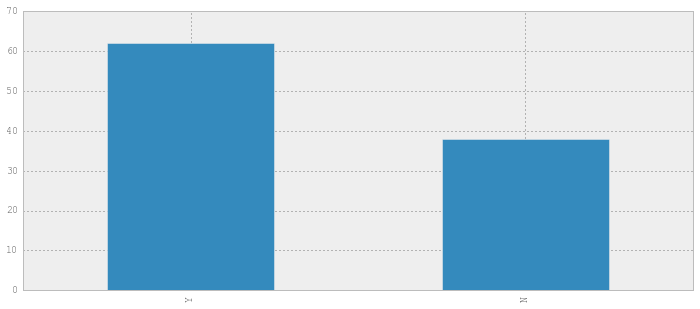

In [77]:
profile['credit_card_flag'].value_counts().plot(kind='bar')

In [78]:
profile['credit_card_flag'].value_counts()

Y    62
N    38
dtype: int64

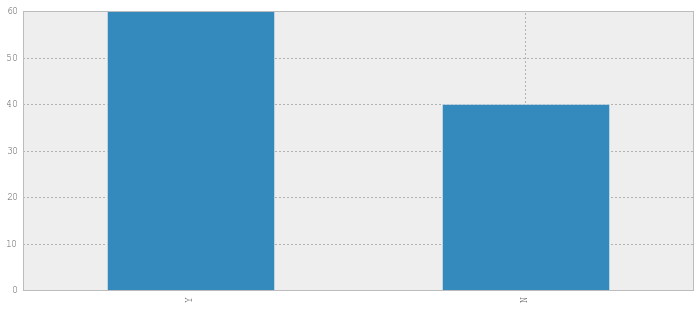

In [79]:
profile['loan_flag'].value_counts().plot(kind='bar')

In [80]:
profile['loan_flag'].value_counts()

Y    60
N    40
dtype: int64

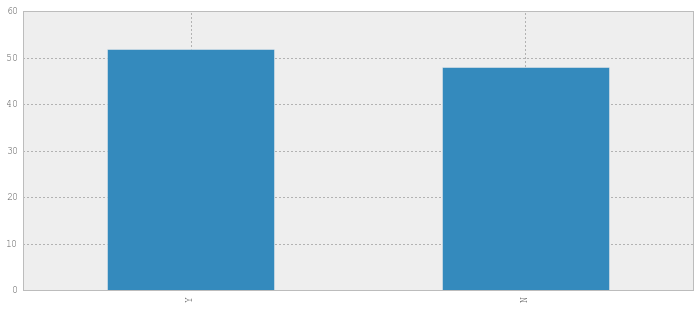

In [82]:
profile['deposit_flag'].value_counts().plot(kind='bar')

In [81]:
profile['deposit_flag'].value_counts()

Y    52
N    48
dtype: int64

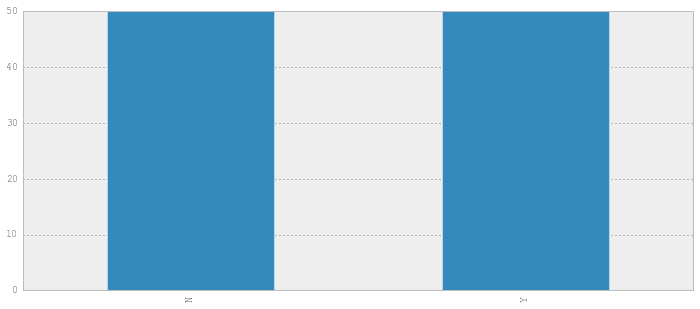

In [83]:
profile['wealth_flag'].value_counts().plot(kind='bar')

In [84]:
profile['wealth_flag'].value_counts()

N    50
Y    50
dtype: int64

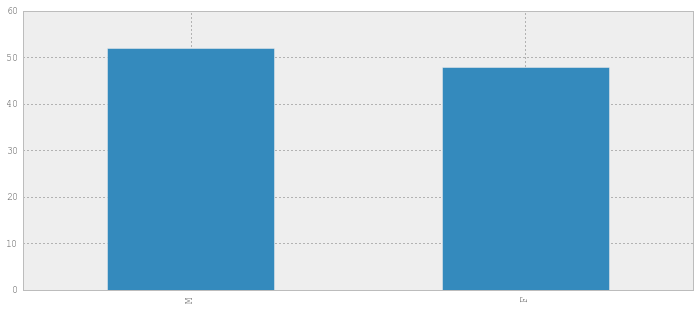

In [68]:
profile['gender'].value_counts().plot(kind='bar')

In [71]:
profile['gender'].value_counts()

M    52
F    48
dtype: int64

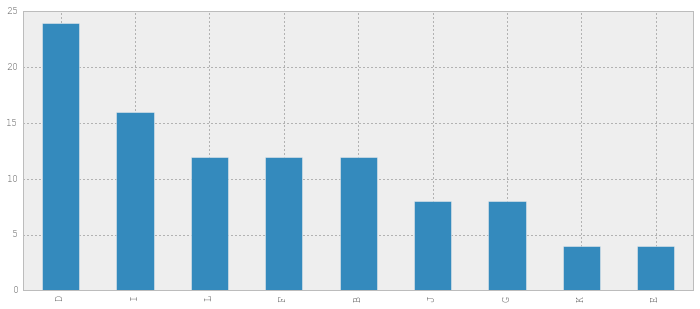

In [69]:
profile['contact_loc'].value_counts().plot(kind='bar')

In [70]:
profile['contact_loc'].value_counts()

D    24
I    16
L    12
F    12
B    12
J     8
G     8
K     4
E     4
dtype: int64

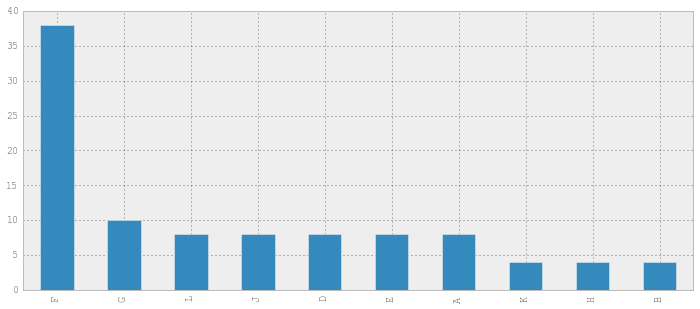

In [75]:
profile['register_loc'].value_counts().plot(kind='bar')

In [76]:
profile['register_loc'].value_counts()

F    38
G    10
L     8
J     8
D     8
E     8
A     8
K     4
H     4
B     4
dtype: int64

In [88]:
temp = pd.crosstab([profile.credit_card_flag, profile.loan_flag], profile.aum)

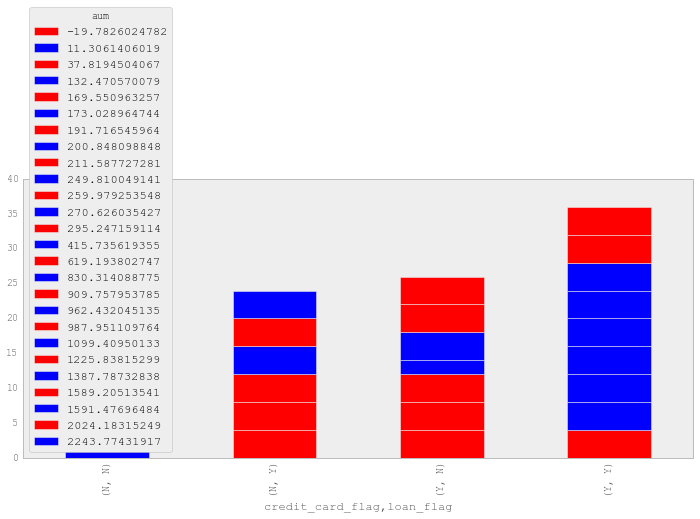

In [89]:
temp.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

In [ ]:
path =r'hackntu_x_cathay_2017-master/dataset/profile/partition_time=*/*'
allFiles = glob.glob(path)
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_, names=[u'customer_id', u'birth_time', u'gender', u'contact_loc',
       u'contact_code', u'register_loc', u'register_code', u'start_time',
       u'aum', u'net_profit', u'credit_card_flag', u'loan_flag',
       u'deposit_flag', u'wealth_flag', u'partition_time'], header=None)
    list_.append(df)

profile = pd.concat(list_)